In [2]:
!pip install kaggle

In [3]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


Importing Face Mask Dataset

In [4]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 89% 145M/163M [00:01<00:00, 91.9MB/s]
100% 163M/163M [00:01<00:00, 107MB/s] 


In [5]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


**Importing the Dependencies**

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [3]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1919.jpg', 'with_mask_108.jpg', 'with_mask_1344.jpg', 'with_mask_1156.jpg', 'with_mask_916.jpg']
['with_mask_3157.jpg', 'with_mask_3162.jpg', 'with_mask_3273.jpg', 'with_mask_183.jpg', 'with_mask_712.jpg']


In [4]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1777.jpg', 'without_mask_3038.jpg', 'without_mask_2116.jpg', 'without_mask_3584.jpg', 'without_mask_1188.jpg']
['without_mask_2256.jpg', 'without_mask_588.jpg', 'without_mask_2174.jpg', 'without_mask_570.jpg', 'without_mask_81.jpg']


In [5]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [6]:
labels = [1]*3725 + [0]*3828

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

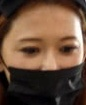

In [7]:
# displaying with mask image
img = cv2.imread('/content/data/with_mask/with_mask_100.jpg')
cv2_imshow(img)

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [8]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [9]:
type(data)

list

In [10]:
len(data)

7553

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[239, 224, 221],
        [242, 224, 218],
        [243, 222, 214],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[238, 223, 217],
        [239, 222, 215],
        [239, 220, 213],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[236, 222, 213],
        [237, 223, 214],
        [236, 221, 213],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
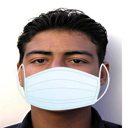

In [11]:
data[0]

In [12]:
type(data[0])

numpy.ndarray

In [13]:
data[0].shape

(128, 128, 3)

In [14]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [15]:
type(X)

numpy.ndarray

In [16]:
type(Y)

numpy.ndarray

In [17]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [18]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [20]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [21]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

**Building a Convolutional Neural Networks (CNN)**

In [22]:
import tensorflow as tf
from tensorflow import keras

In [23]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [24]:
# compile the neural network
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

In [25]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 11s 21ms/step - loss: 0.3692 - acc: 0.8391 - val_loss: 0.3345 - val_acc: 0.8661
Epoch 2/5
170/170 [==============================] - 3s 16ms/step - loss: 0.2486 - acc: 0.9056 - val_loss: 0.2602 - val_acc: 0.9008
Epoch 3/5
170/170 [==============================] - 3s 16ms/step - loss: 0.1824 - acc: 0.9283 - val_loss: 0.2487 - val_acc: 0.9074
Epoch 4/5
170/170 [==============================] - 3s 15ms/step - loss: 0.1319 - acc: 0.9485 - val_loss: 0.2894 - val_acc: 0.9025
Epoch 5/5
170/170 [==============================] - 3s 16ms/step - loss: 0.0984 - acc: 0.9643 - val_loss: 0.2813 - val_acc: 0.9207


**Model Evaluation**

In [26]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 1s 10ms/step - loss: 0.2268 - acc: 0.9358
Test Accuracy = 0.9358041286468506


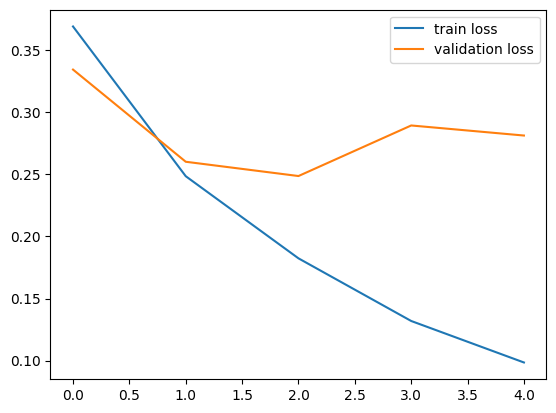

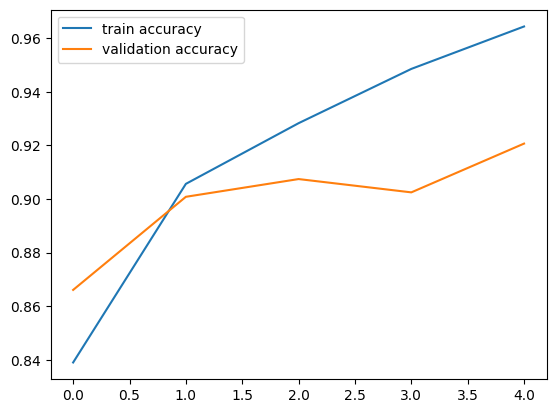

In [27]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()